# Potato 분류
- epoches >= 10
- Potato__Late_blight
- Potato__healthy
- Potato__Early_blight

## Import

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

time: 387 µs (started: 2024-07-01 07:09:46 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

import tensorflow as tf
import keras

time: 15.7 s (started: 2024-07-01 07:09:46 +00:00)


## 데이터 불러오기

In [ ]:
#!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

time: 598 µs (started: 2024-07-01 07:10:02 +00:00)


In [ ]:
#!unzip /content/PlantVillage.zip

time: 221 µs (started: 2024-07-01 07:10:02 +00:00)


In [ ]:
import os

class_name = ['Late', 'healthy', 'Early']

train_late_fnames = os.listdir('/content/PlantVillage/Potato___Late_blight')
train_healthy_fnames = os.listdir('/content/PlantVillage/Potato___healthy')
train_early_fnames = os.listdir('/content/PlantVillage/Potato___Early_blight')

time: 2.79 ms (started: 2024-07-01 07:10:02 +00:00)


In [ ]:
import PIL

X_train = []
y_train = []

for fname in train_late_fnames:
    image = PIL.Image.open('/content/PlantVillage/Potato___Late_blight/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

for fname in train_healthy_fnames:
    image = PIL.Image.open('/content/PlantVillage/Potato___healthy/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

for fname in train_early_fnames:
    image = PIL.Image.open('/content/PlantVillage/Potato___Early_blight/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(2)

time: 12.8 s (started: 2024-07-01 07:10:02 +00:00)


In [ ]:
print(len(X_train),len(y_train))

2152 2152
time: 1.8 ms (started: 2024-07-01 07:10:15 +00:00)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

(2152, 224, 224, 3) (2152,)
time: 141 ms (started: 2024-07-01 07:10:15 +00:00)


### 데이터 표시

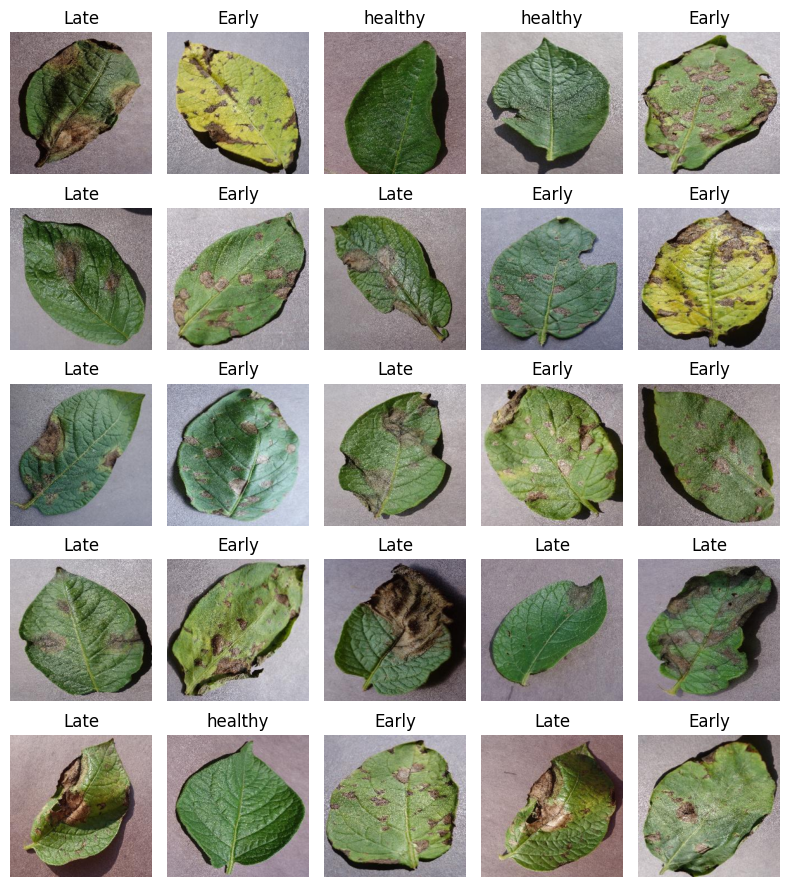

time: 4.06 s (started: 2024-07-01 07:10:15 +00:00)


In [ ]:
np.random.seed(42)
sample = np.random.randint(2152, size = 25)

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

In [ ]:
pd.Series(y_train).value_counts()

0    1000
2    1000
1     152
Name: count, dtype: int64

time: 26.8 ms (started: 2024-07-01 07:10:19 +00:00)


## 학습, 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True, random_state=42, stratify=y_train)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1721, 224, 224, 3) (1721,)
(431, 224, 224, 3) (431,)
time: 526 ms (started: 2024-07-01 07:10:19 +00:00)


## 데이터 전처리

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_s = X_train / 255.
X_val_s = X_val / 255.

time: 1.57 s (started: 2024-07-01 07:10:20 +00:00)


In [ ]:
X_train_s.shape, X_val_s.shape

((1721, 224, 224, 3), (431, 224, 224, 3))

time: 10.9 ms (started: 2024-07-01 07:10:21 +00:00)


In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 919 µs (started: 2024-07-01 07:10:21 +00:00)


In [ ]:
y_train_o.shape, y_val_o.shape

((1721, 3), (431, 3))

time: 3.96 ms (started: 2024-07-01 07:10:21 +00:00)


## CNN
- 학습 곡선, 평가

In [ ]:
X_train_s.shape

(1721, 224, 224, 3)

time: 10.8 ms (started: 2024-07-01 07:10:21 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
    # 여기까지 분류기 -----------------------------------------------------
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

time: 39 ms (started: 2024-07-01 07:10:23 +00:00)


In [ ]:
print(X_train_s.shape, y_train_o.shape)
print(X_val_s.shape, y_val_o.shape)

(1721, 224, 224, 3) (1721, 3)
(431, 224, 224, 3) (431, 3)
time: 589 µs (started: 2024-07-01 07:10:23 +00:00)


In [ ]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor='val_loss', patience=5)

time: 451 µs (started: 2024-07-01 07:10:23 +00:00)


In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train_o, epochs=EPOCHS, callbacks=[es],
                    batch_size=BATCH_SIZE, validation_data=(X_val_s,y_val_o))

Epoch 1/30
54/54 [==============================] - 19s 116ms/step - loss: 1.0527 - acc: 0.6880 - val_loss: 0.3639 - val_acc: 0.8561
Epoch 2/30
54/54 [==============================] - 3s 49ms/step - loss: 0.3233 - acc: 0.8722 - val_loss: 0.1679 - val_acc: 0.9443
Epoch 3/30
54/54 [==============================] - 3s 52ms/step - loss: 0.1774 - acc: 0.9343 - val_loss: 0.1679 - val_acc: 0.9397
Epoch 4/30
54/54 [==============================] - 2s 34ms/step - loss: 0.1122 - acc: 0.9587 - val_loss: 0.1140 - val_acc: 0.9606
Epoch 5/30
54/54 [==============================] - 2s 34ms/step - loss: 0.0793 - acc: 0.9721 - val_loss: 0.3267 - val_acc: 0.8979
Epoch 6/30
54/54 [==============================] - 2s 32ms/step - loss: 0.0439 - acc: 0.9855 - val_loss: 0.1313 - val_acc: 0.9606
Epoch 7/30
54/54 [==============================] - 2s 34ms/step - loss: 0.0232 - acc: 0.9919 - val_loss: 0.1877 - val_acc: 0.9490
Epoch 8/30
54/54 [==============================] - 2s 32ms/step - loss: 0.0331 -

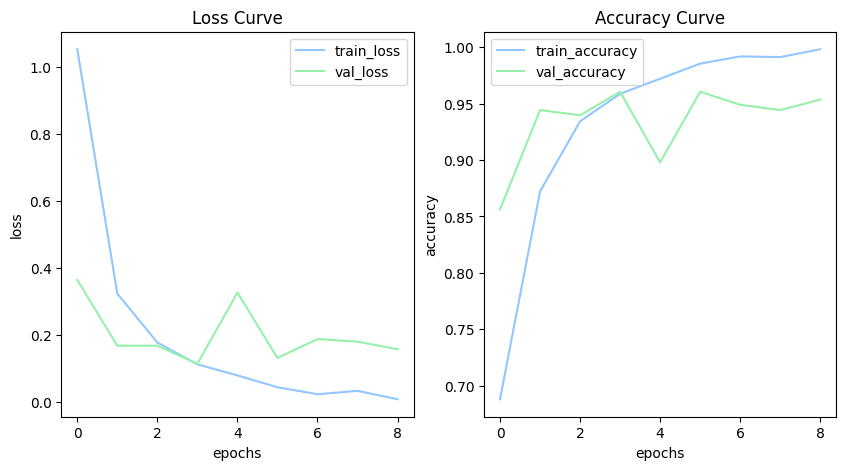

time: 7.61 s (started: 2024-07-01 07:11:04 +00:00)


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['acc'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_acc'],label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

plot_history(history)

## 전이 학습 - MobileNetV2 model
- 학습 곡선, 평가

In [ ]:
from keras.applications import MobileNetV2

base_model = MobileNetV2(include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [ ]:
from keras import layers

model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

time: 17.4 ms (started: 2024-07-01 07:12:38 +00:00)


In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train_o, epochs=EPOCHS, callbacks=[es],
                    batch_size=BATCH_SIZE, validation_data=(X_val_s,y_val_o))

Epoch 1/30
54/54 [==============================] - 13s 154ms/step - loss: 1.6796 - acc: 0.8187 - val_loss: 0.1624 - val_acc: 0.9675
Epoch 2/30
54/54 [==============================] - 3s 55ms/step - loss: 0.2777 - acc: 0.9506 - val_loss: 0.0752 - val_acc: 0.9768
Epoch 3/30
54/54 [==============================] - 3s 54ms/step - loss: 0.1027 - acc: 0.9721 - val_loss: 0.1010 - val_acc: 0.9745
Epoch 4/30
54/54 [==============================] - 3s 58ms/step - loss: 0.0358 - acc: 0.9907 - val_loss: 0.0636 - val_acc: 0.9838
Epoch 5/30
54/54 [==============================] - 3s 57ms/step - loss: 0.0403 - acc: 0.9924 - val_loss: 0.0517 - val_acc: 0.9884
Epoch 6/30
54/54 [==============================] - 3s 56ms/step - loss: 0.0488 - acc: 0.9919 - val_loss: 0.0453 - val_acc: 0.9907
Epoch 7/30
54/54 [==============================] - 3s 55ms/step - loss: 0.0613 - acc: 0.9866 - val_loss: 0.1198 - val_acc: 0.9814
Epoch 8/30
54/54 [==============================] - 3s 57ms/step - loss: 0.0310 -

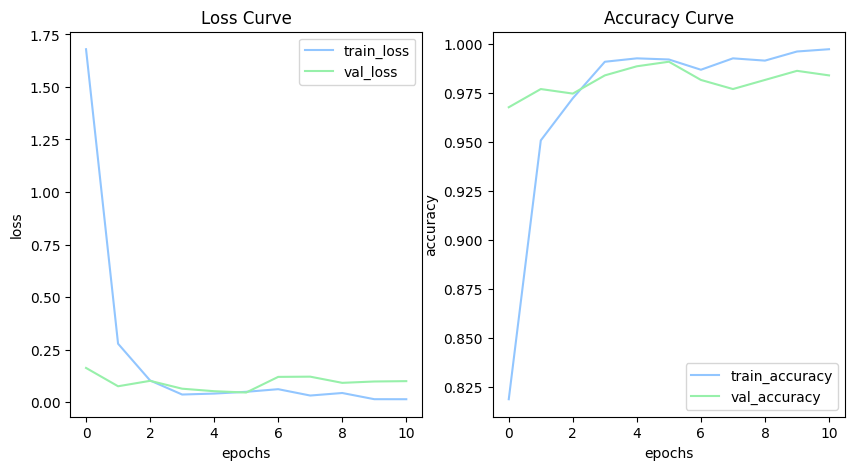

time: 18.4 s (started: 2024-07-01 07:14:04 +00:00)


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['acc'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_acc'],label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

plot_history(history)